In [3]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from lstm import *

from data_processing import get_and_save_data, get_train_test_data, convert_to_1d
from globals import DATA
from training_functions import *




In [4]:
get_and_save_data(dir_path=DATA)

model, train_loader, encoder_input_train, decoder_output_train, encoder_input_test, decoder_output_test = get_data_and_model(input_dim=2, hidden_dim=64, layer_dim=3, output_dim=1)

(240000,)


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loss_curve, train_loss, test_loss = train_lstm(model, device, train_loader, num_epochs=10, lr = 0.001, weight_decay = 0, encoder_input_test=encoder_input_test, decoder_output_test=decoder_output_test)
#, encoder_input_test=encoder_input_test, decoder_output_test=decoder_output_test

Epoch: 1/10, Step: 100/1853, Loss: 0.0342
train_mse: 0.0302, test_mse: 0.0368
Epoch: 1/10, Step: 200/1853, Loss: 0.0325
train_mse: 0.0136, test_mse: 0.0383
Epoch: 1/10, Step: 300/1853, Loss: 0.0250
train_mse: 0.0224, test_mse: 0.0363
Epoch: 1/10, Step: 400/1853, Loss: 0.0215
train_mse: 0.0442, test_mse: 0.0490
Epoch: 1/10, Step: 500/1853, Loss: 0.0235
train_mse: 0.0244, test_mse: 0.0478
Epoch: 1/10, Step: 600/1853, Loss: 0.0215
train_mse: 0.0308, test_mse: 0.0493
Epoch: 1/10, Step: 700/1853, Loss: 0.0207
train_mse: 0.0292, test_mse: 0.0476
Epoch: 1/10, Step: 800/1853, Loss: 0.0184
train_mse: 0.0273, test_mse: 0.0411
Epoch: 1/10, Step: 900/1853, Loss: 0.0213
train_mse: 0.0112, test_mse: 0.0328
Epoch: 1/10, Step: 1000/1853, Loss: 0.0194
train_mse: 0.0203, test_mse: 0.0515
Epoch: 1/10, Step: 1100/1853, Loss: 0.0199
train_mse: 0.0224, test_mse: 0.0349
Epoch: 1/10, Step: 1200/1853, Loss: 0.0195
train_mse: 0.1468, test_mse: 0.0561
Epoch: 1/10, Step: 1300/1853, Loss: 0.0175
train_mse: 0.0340,

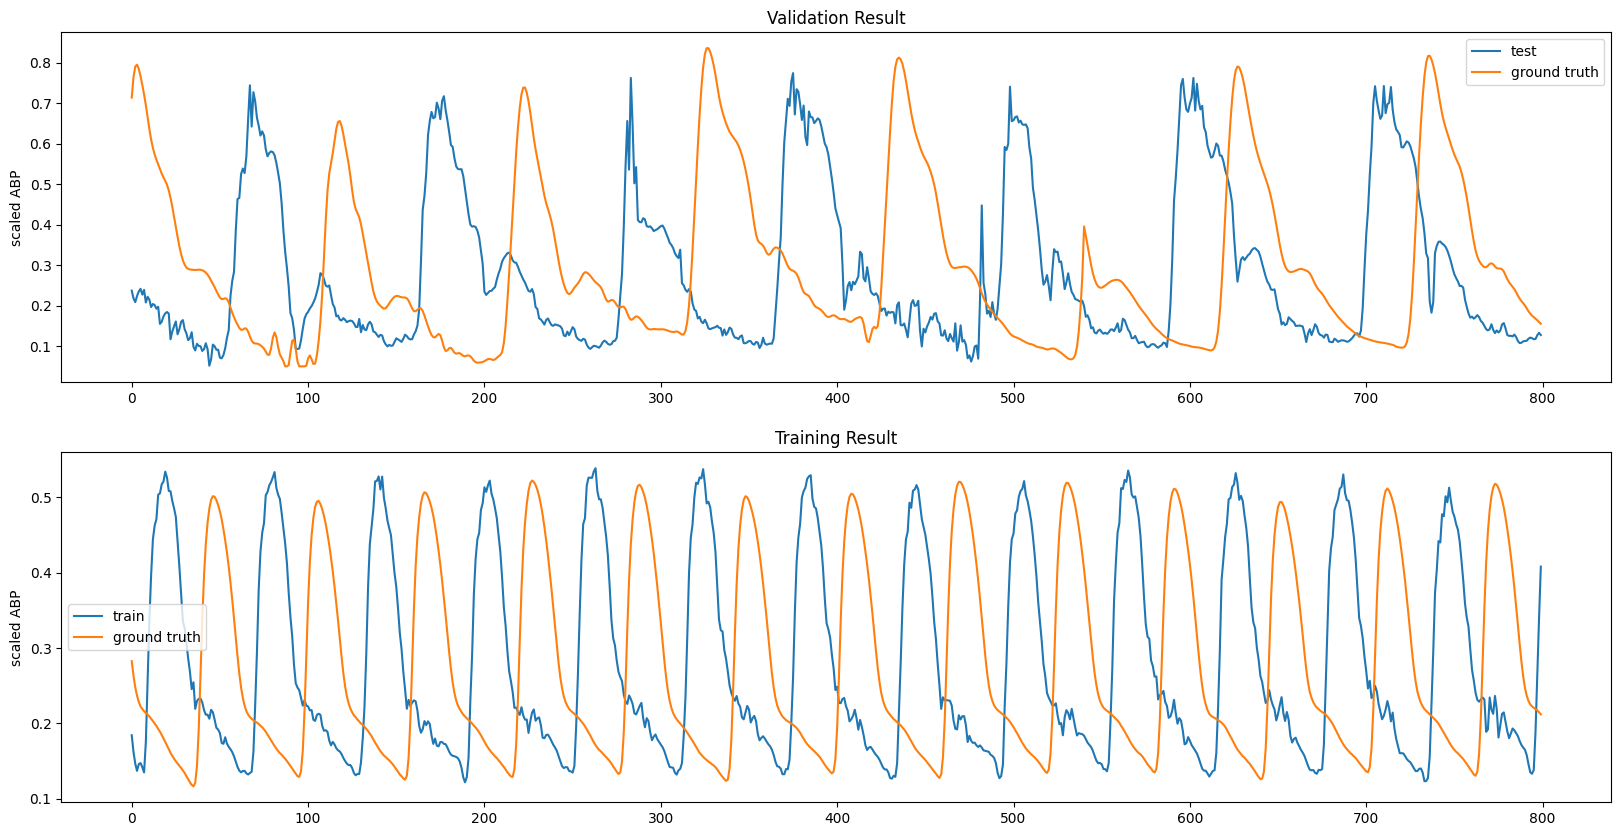

In [6]:
view_train_test_result(model, encoder_input_train, decoder_output_train, encoder_input_test, decoder_output_test)

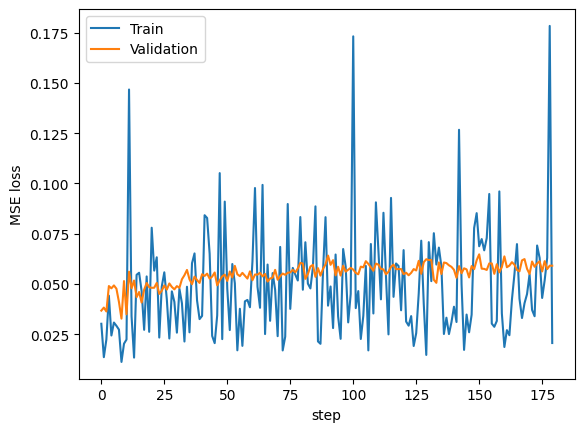

In [7]:
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Validation')
plt.xlabel('step')
plt.ylabel('MSE loss')
plt.legend()

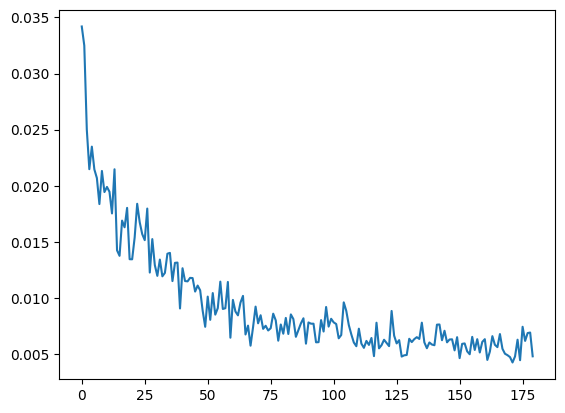

In [8]:
plt.plot(loss_curve)